In [2]:
import os
from os.path import join, exists, basename, dirname, expanduser
from glob import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxa
import geopandas as gpd
from scipy.optimize import curve_fit

# GM

In [4]:
# ds = xr.open_dataset('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_GM/GM_cor_vv.nc')
# def temp_model(T, tau):
#     return np.exp(-T/tau)
    
# def tau(cors, days):
#     if np.sum(np.isnan(cors)) == 0:
#         s = curve_fit(temp_model, days, cors, 5)[0][0]
#         return s
#     else:
#         return np.nan
# taus = np.apply_along_axis(arr = ds['cor_vv'].values, func1d = tau, axis = 0, days = days)

In [13]:
coarse = rxa.open_rasterio('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_GM/gm_coarse.tiff')
gm_taus = rxa.open_rasterio('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_GM/taus.tiff')
coarse.values[0] = gm_taus

In [3]:
dem = rxa.open_rasterio('../../../data/coherence_spatial_GM/gm_dem.tiff')

roads = '/bsuhome/zacharykeskinen/scratch/data/uavsar/roads/Shape/Trans_RoadSegment.shp'
roads = '../../../data/aucillary/roads/Shape/Trans_RoadSegment.shp'
roads = gpd.read_file(roads)
hwy21 = roads[roads.state_ro_1 == '21']
fires = gpd.read_file('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_lowman/mtbs_perimeter_data/mtbs_perims_DD.shp')
water = gpd.read_file('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_GM/gm_water.shp')
# trees = gpd.read_file('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_GM/gm_trees.shp')
trees = gpd.read_file('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_GM/trees_selected.shp')

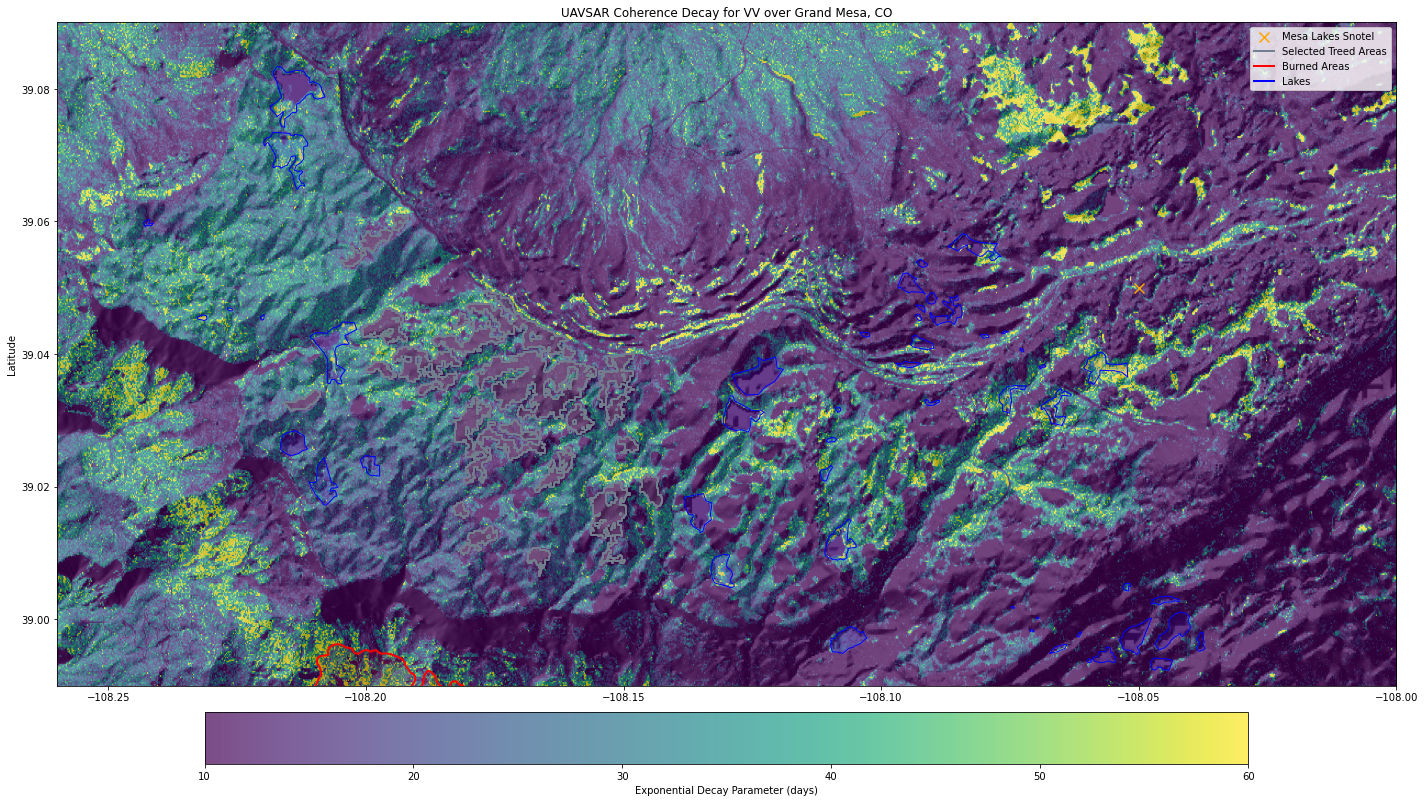

In [14]:
from matplotlib.colors import LightSource
figdir = '/Users/zachkeskinen/Documents/uavsar/figures/coherence_spatial'
fig, ax = plt.subplots(figsize = (24,16))

dx = 0.0005
dy = 0.0005
conversion = 6

ls = LightSource(azdeg = 315, altdeg = 45)
cmap = plt.cm.gist_earth
rgb = ls.hillshade(dem.values[0], vert_exag=10, dx = dx*conversion, dy = dy*conversion)
plt.imshow(rgb, extent = (dem.x.min().data,dem.x.max().data, dem.y.min().data, dem.y.max().data), cmap = 'gray')
plt.imshow(gm_taus[0], vmin = 10, vmax = 60, alpha = 0.7, extent = (dem.x.min().data,dem.x.max().data, dem.y.min().data, dem.y.max().data))
cbar = plt.colorbar(fraction = 0.06, orientation = 'horizontal', label = 'Exponential Decay Parameter (days)', pad = 0.03)
# cbar.ax.set_xticklabels(['12 Days', 'Medium', 'High'])  # horizontal colorbar

# add some other pieces
snotel_coords = (-108.05, 39.05)
plt.scatter(*snotel_coords, s = 100, marker = 'x', color = 'orange', label = 'Mesa Lakes Snotel')

trees.plot(fc = 'none', ec = 'slategrey', linewidth = 2, ax= ax)
trees.plot(fc = 'grey', ec = 'none', linewidth = 2, ax= ax, alpha = 0.2)
plt.plot([1,1],[1,1], linewidth = 2, color = 'slategrey', label = 'Selected Treed Areas')

fires.plot(ax = ax, fc = 'red', ec ='none', linewidth = 2, alpha = 0.1)
fires.plot(ax = ax, fc = 'none', ec ='red', linewidth = 2, alpha = 1)
plt.plot([1,1],[1,1], linewidth = 2, color = 'red', label = 'Burned Areas')

# deep_snow.plot(ax =ax , fc = 'blue', alpha = 0.1)
# deep_snow.plot(ax =ax , fc = 'none',ec = 'blue', linewidth = 1)
# plt.plot([1,1],[1,1], linewidth = 2, color = 'blue', label = '3+m Snowpack')

water.plot(ax =ax , fc = 'blue', alpha = 0.1)
water.plot(ax =ax , fc = 'none',ec = 'blue', linewidth = 1)
plt.plot([1,1],[1,1], linewidth = 2, color = 'blue', label = 'Lakes')

plt.xlim(-108.26, -108)
plt.ylim(38.99, 39.09)
plt.ylabel('Latitude')
# plt.xlabel('Longitude')
plt.legend()
plt.title('UAVSAR Coherence Decay for VV over Grand Mesa, CO')
plt.savefig(join(figdir, 'uavsar_tau_VV_GM.png'))

## Sentinel

In [4]:
s1_gm_taus = rxa.open_rasterio('/Users/zachkeskinen/Documents/uavsar/results/taus/s1_gm.tif')

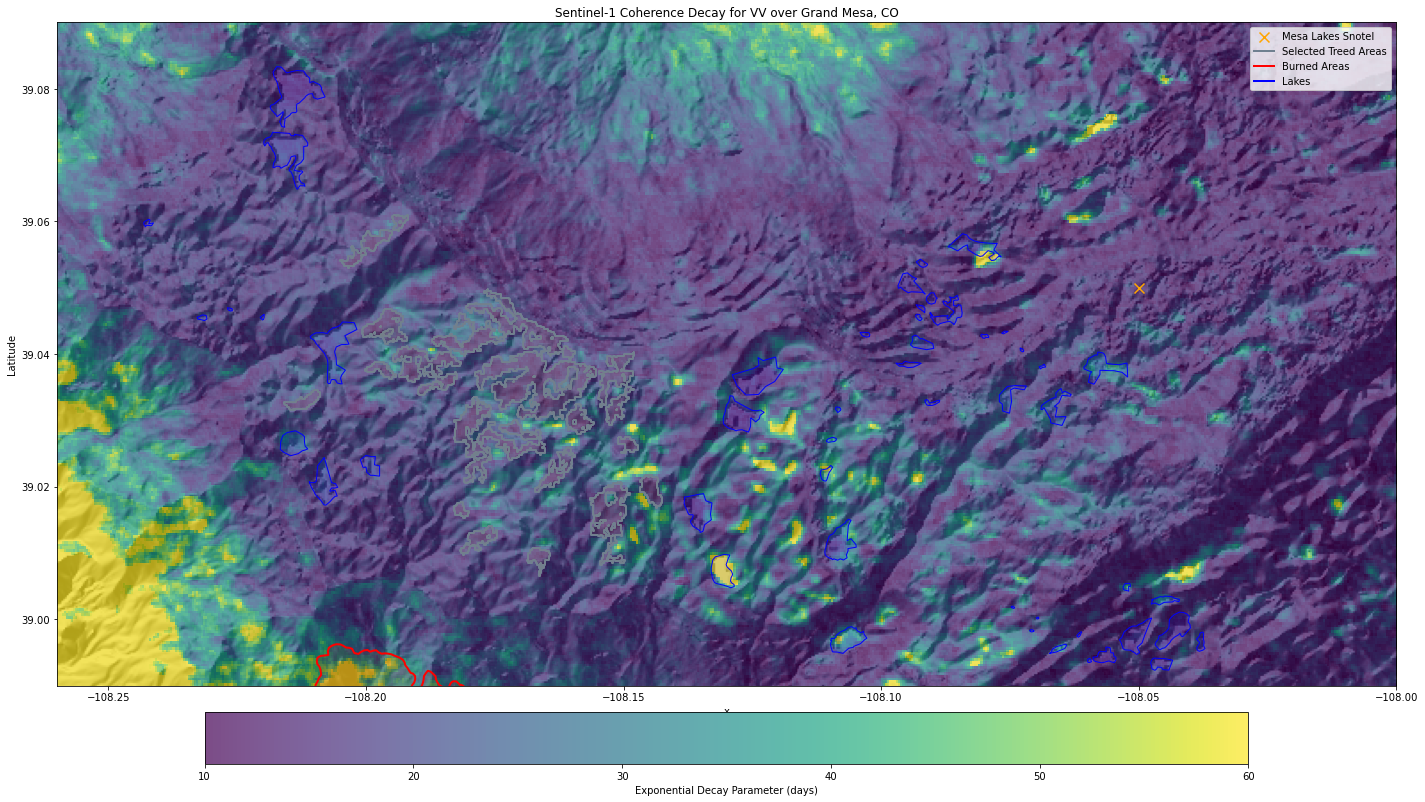

In [11]:
from matplotlib.colors import LightSource
figdir = '/Users/zachkeskinen/Documents/uavsar/figures/coherence_spatial'
fig, ax = plt.subplots(figsize = (24,16))

dx = 0.0005
dy = 0.0005
conversion = 6

ls = LightSource(azdeg = 315, altdeg = 45)
cmap = plt.cm.gist_earth
rgb = ls.hillshade(dem.values[0], vert_exag=10, dx = dx*conversion, dy = dy*conversion)
plt.imshow(rgb, extent = (dem.x.min().data,dem.x.max().data, dem.y.min().data, dem.y.max().data), cmap = 'gray')
# plt.imshow(s1_gm_taus.values[0], vmin = 10, vmax = 60, alpha = 0.7, extent = (dem.x.min().data,dem.x.max().data, dem.y.min().data, dem.y.max().data))
s1_gm_taus.plot(ax = ax, vmin = 10, vmax = 60, alpha = 0.7, cbar_kwargs = {'fraction':0.06, 'orientation': 'horizontal', 'pad': 0.03, 'label':'Exponential Decay Parameter (days)', 'extend':'neither'})
# cbar = plt.colorbar(fraction = 0.06, orientation = 'horizontal', label = 'Exponential Decay Parameter (days)', pad = 0.03)
# cbar.ax.set_xticklabels(['12 Days', 'Medium', 'High'])  # horizontal colorbar

# add some other pieces
snotel_coords = (-108.05, 39.05)
plt.scatter(*snotel_coords, s = 100, marker = 'x', color = 'orange', label = 'Mesa Lakes Snotel')

trees.plot(fc = 'none', ec = 'slategrey', linewidth = 2, ax= ax)
trees.plot(fc = 'grey', ec = 'none', linewidth = 2, ax= ax, alpha = 0.2)
plt.plot([1,1],[1,1], linewidth = 2, color = 'slategrey', label = 'Selected Treed Areas')

fires.plot(ax = ax, fc = 'red', ec ='none', linewidth = 2, alpha = 0.1)
fires.plot(ax = ax, fc = 'none', ec ='red', linewidth = 2, alpha = 1)
plt.plot([1,1],[1,1], linewidth = 2, color = 'red', label = 'Burned Areas')

water.plot(ax =ax , fc = 'blue', alpha = 0.1)
water.plot(ax =ax , fc = 'none',ec = 'blue', linewidth = 1)
plt.plot([1,1],[1,1], linewidth = 2, color = 'blue', label = 'Lakes')

plt.xlim(-108.26, -108)
plt.ylim(38.99, 39.09)
plt.ylabel('Latitude')
# plt.xlabel('Longitude')
plt.legend()
plt.title('Sentinel-1 Coherence Decay for VV over Grand Mesa, CO')
plt.savefig(join(figdir, 's1_tau_VV_GM.png'))

# Lowman

In [23]:
ds = xr.open_dataset('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_lowman/cor_vv.nc')
with open('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_lowman/cor_coarse.pkl', 'rb') as f:
    coarse = pickle.load(f)
with open('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_lowman/taus.pkl', 'rb') as f:
    lowman_taus = pickle.load(f)
coarse.values[0] = lowman_taus

In [24]:
dem = rxa.open_rasterio('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_lowman/dem.tiff')

roads = '/bsuhome/zacharykeskinen/scratch/data/uavsar/roads/Shape/Trans_RoadSegment.shp'
roads = '../../../data/aucillary/roads/Shape/Trans_RoadSegment.shp'
roads = gpd.read_file(roads)
hwy21 = roads[roads.state_ro_1 == '21']
fires = gpd.read_file('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_lowman/mtbs_perimeter_data/mtbs_perims_DD.shp')
# water = gpd.read_file('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_GM/gm_water.shp')
trees = gpd.read_file('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_lowman/tree_less.shp')
lc = rxa.open_rasterio('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_lowman/id_16/nlcd_id_utm11.tif')
lc = lc.rio.reproject_match(dem)
deep_snow = gpd.read_file('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_lowman/deep_snow.shp')

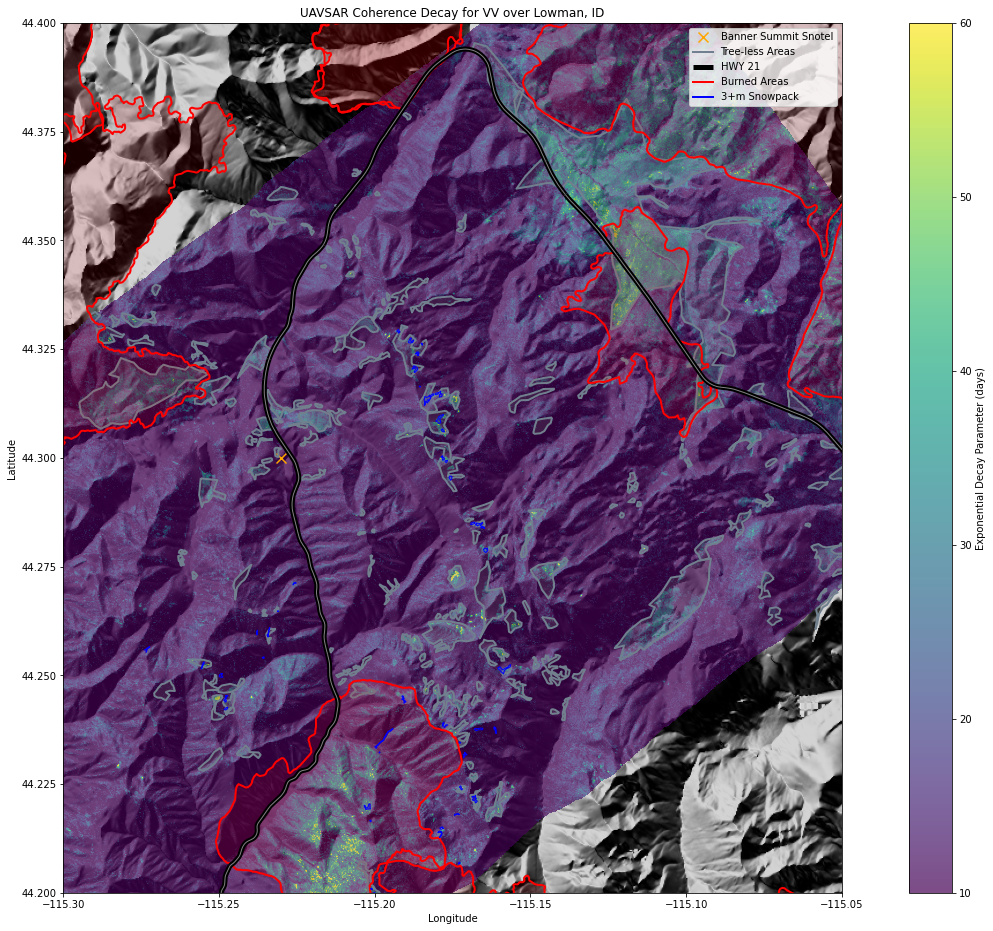

In [31]:
from matplotlib.colors import LightSource
figdir = '/Users/zachkeskinen/Documents/uavsar/figures/coherence_spatial'
fig, ax = plt.subplots(figsize = (24,16))

dx = 0.0005
dy = 0.0005
conversion = 6

ls = LightSource(azdeg = 315, altdeg = 45)
cmap = plt.cm.gist_earth
rgb = ls.hillshade(dem.values[0], vert_exag=10, dx = dx*conversion, dy = dy*conversion)
plt.imshow(rgb, extent = (dem.x.min().data,dem.x.max().data, dem.y.min().data, dem.y.max().data), cmap = 'gray')
plt.imshow(lowman_taus, vmin = 10, vmax = 60, alpha = 0.7, extent = (dem.x.min().data,dem.x.max().data, dem.y.min().data, dem.y.max().data))
plt.colorbar(fraction = 0.1, label = 'Exponential Decay Parameter (days)')
# add some other pieces
snotel_coords = (-115.23, 44.3)
plt.scatter(*snotel_coords, s = 100, marker = 'x', color = 'orange', label = 'Banner Summit Snotel')

trees.plot(fc = 'none', ec = 'slategrey', linewidth = 2, ax= ax)
trees.plot(fc = 'grey', ec = 'none', linewidth = 2, ax= ax, alpha = 0.2)
plt.plot([1,1],[1,1], linewidth = 2, color = 'slategrey', label = 'Tree-less Areas')

hwy21.plot(label = 'HWY 21', ec = 'black', fc = 'None', linewidth = 5, ax= ax)
hwy21.plot(ec = 'grey', fc = 'None', linewidth = 1, ax= ax)

fires.plot(ax = ax, fc = 'red', ec ='none', linewidth = 2, alpha = 0.1)
fires.plot(ax = ax, fc = 'none', ec ='red', linewidth = 2, alpha = 1)
plt.plot([1,1],[1,1], linewidth = 2, color = 'red', label = 'Burned Areas')

deep_snow.plot(ax =ax , fc = 'blue', alpha = 0.1)
deep_snow.plot(ax =ax , fc = 'none',ec = 'blue', linewidth = 1)
plt.plot([1,1],[1,1], linewidth = 2, color = 'blue', label = '3+m Snowpack')

plt.xlim(-115.3, -115.05)
plt.ylim(44.2, 44.4)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend()
plt.title('UAVSAR Coherence Decay for VV over Lowman, ID')
plt.savefig(join(figdir, 'Uavsar_tau_VV_lowman.png'))

## Sentinel

In [27]:
with open('/Users/zachkeskinen/Documents/uavsar/data/coherence_spatial_lowman/cor_coarse.pkl', 'rb') as f:
    coarse = pickle.load(f)
lowman_s1_taus = rxa.open_rasterio('/Users/zachkeskinen/Documents/uavsar/results/taus/s1_lowman.tif')
# coarse.values[0] = taus

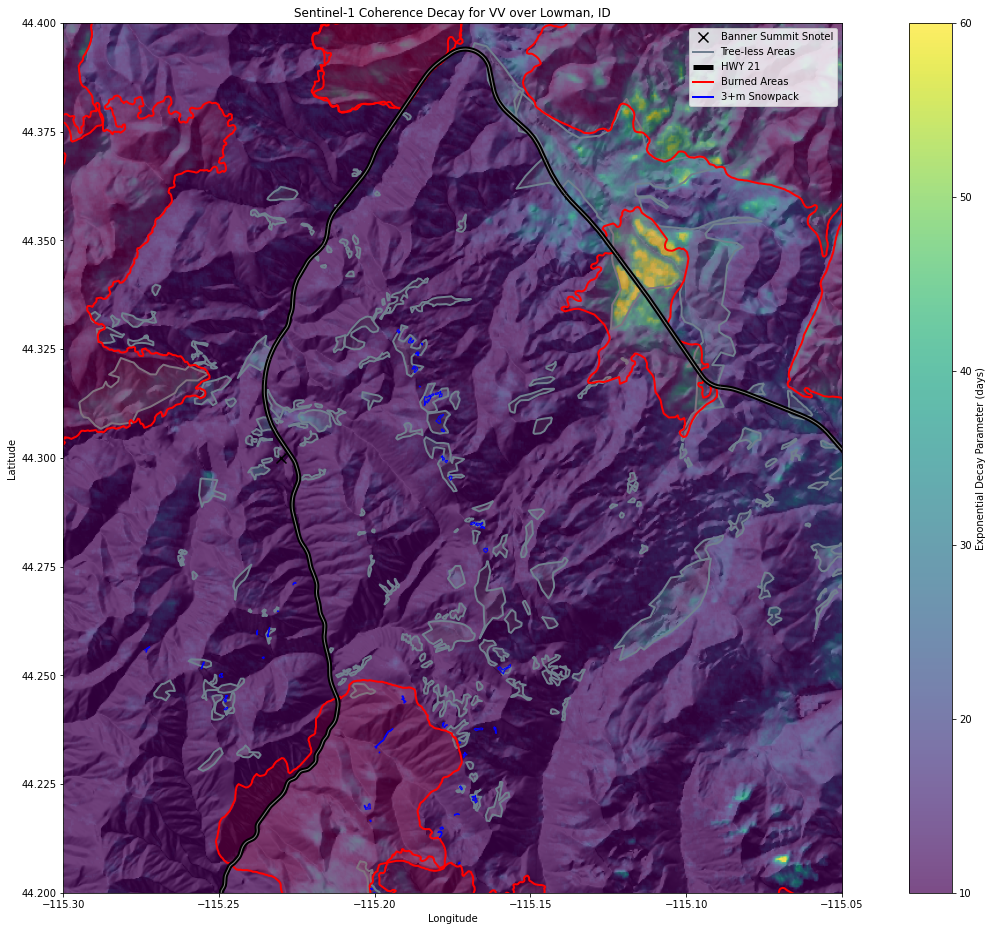

In [30]:
from matplotlib.colors import LightSource
figdir = '/Users/zachkeskinen/Documents/uavsar/figures/coherence_spatial'
fig, ax = plt.subplots(figsize = (24,16))

dx = 0.0005
dy = 0.0005
conversion = 6

ls = LightSource(azdeg = 315, altdeg = 45)
cmap = plt.cm.gist_earth
rgb = ls.hillshade(dem.values[0], vert_exag=10, dx = dx*conversion, dy = dy*conversion)
plt.imshow(rgb, extent = (dem.x.min().data,dem.x.max().data, dem.y.min().data, dem.y.max().data), cmap = 'gray')
plt.imshow(lowman_s1_taus.values[0], vmin = 10, vmax = 60, alpha = 0.7, extent = (lowman_s1_taus.x.min().data,lowman_s1_taus.x.max().data, lowman_s1_taus.y.min().data, lowman_s1_taus.y.max().data))
plt.colorbar(fraction = 0.1, label = 'Exponential Decay Parameter (days)')
# add some other pieces
snotel_coords = (-115.23, 44.3)
plt.scatter(*snotel_coords, s = 100, marker = 'x', color = 'black', label = 'Banner Summit Snotel')

trees.plot(fc = 'none', ec = 'slategrey', linewidth = 2, ax= ax)
trees.plot(fc = 'grey', ec = 'none', linewidth = 2, ax= ax, alpha = 0.2)
plt.plot([1,1],[1,1], linewidth = 2, color = 'slategrey', label = 'Tree-less Areas')

hwy21.plot(label = 'HWY 21', ec = 'black', fc = 'None', linewidth = 5, ax= ax)
hwy21.plot(ec = 'grey', fc = 'None', linewidth = 1, ax= ax)

fires.plot(ax = ax, fc = 'red', ec ='none', linewidth = 2, alpha = 0.1)
fires.plot(ax = ax, fc = 'none', ec ='red', linewidth = 2, alpha = 1)
plt.plot([1,1],[1,1], linewidth = 2, color = 'red', label = 'Burned Areas')

deep_snow.plot(ax =ax , fc = 'blue', alpha = 0.1)
deep_snow.plot(ax =ax , fc = 'none',ec = 'blue', linewidth = 1)
plt.plot([1,1],[1,1], linewidth = 2, color = 'blue', label = '3+m Snowpack')

plt.xlim(-115.3, -115.05)
plt.ylim(44.2, 44.4)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend()
plt.title('Sentinel-1 Coherence Decay for VV over Lowman, ID')
plt.savefig(join(figdir, 'Sentinel_tau_VV_lowman.png'))